In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

In [58]:
def f(x,y,t):
    return 0.5*(t*(x**2) + (1+t)*(y**2) ) + (t**0.5)*x*y - x

In [59]:
def df_dx(x,y,t) :
    return t*(x) + (t**0.5)*y - 1

def df_dy(x,y,t) :
    return (t**0.5)*x + (1+t)*y

In [60]:
def L2Norm(x,y,t) :
    grad_x = df_dx(x,y,t);
    grad_y = df_dy(x,y,t);
    return np.sqrt(grad_x**2 + grad_y**2)


In [61]:
def nagd(x_start , y_start , t, alpha_k , beta_k) :

    x = x_start
    y = y_start

    x_prev = x_start
    y_prev = y_start

    count = 0
    norm = L2Norm(x,y,t)
    TLevel = 10**(-8)

    f_values = []

    while(norm > TLevel) :
        grad_x = df_dx(x,y,t)
        grad_y = df_dy(x,y,t)

        grad_x_pert = df_dx(x + (beta_k)*(x-x_prev) , y + (beta_k)*(y - y_prev) , t)
        grad_y_pert = df_dy(x + (beta_k)*(x-x_prev) , y + (beta_k)*(y - y_prev) , t)

        x_present = x
        y_present = y

        x = x - alpha_k*grad_x_pert + (beta_k)*(x-x_prev)
        y = y - alpha_k*grad_y_pert + (beta_k)*(y-y_prev)

        f_values.append(f(x, y,t))
        norm = L2Norm(x,y,t)
        count = count + 1
        x_prev = x_present
        y_prev = y_present
       

    print(f"Iterations: {count}")
    print(x,y,f(x,y,t))
    
    return x,y,f(x,y,t),f_values



In [62]:
def gradient_descent(x_start , y_start , t, alpha_k) :

    x = x_start
    y = y_start

    count = 0
    norm = L2Norm(x,y,t)
    TLevel = 10**(-8)

    f_values = []

    while(norm > TLevel) :
        grad_x = df_dx(x,y,t)
        grad_y = df_dy(x,y,t)

        x = x - alpha_k*grad_x
        y = y - alpha_k*grad_y


        norm = L2Norm(x,y,t)
        count = count + 1
       
        f_values.append(f(x, y,t))

    print(f"Iterations: {count}")
    print(x,y,f(x,y,t))

    return x,y,f(x,y,t),f_values
    
   

In [63]:
x_range = np.arange(-10,10,0.1)
y_range = np.arange(-10,10,0.1)

X,Y = np.meshgrid(x_range,y_range)

x_start , y_start = 3 , 5
t = 0.001

Z = f(X,Y,t)

alpha_k = 2.0 / (3.0 - (9-(4*(t**2)))**0.5)
mu_not = (3.0 + (9-(4*(t**2)))**0.5) / (3.0 - (9-(4*(t**2)))**0.5)
beta_k = ((mu_not**0.5)-1.0) / ((mu_not**0.5)+1.0)

x_nagd ,y_nagd ,f_nagd, f_val_nagd = nagd(x_start , y_start , t, alpha_k , beta_k)

x_gd ,y_gd ,f_gd, f_val_gd = gradient_descent(x_start , y_start , t , alpha_k)




OverflowError: (34, 'Result too large')

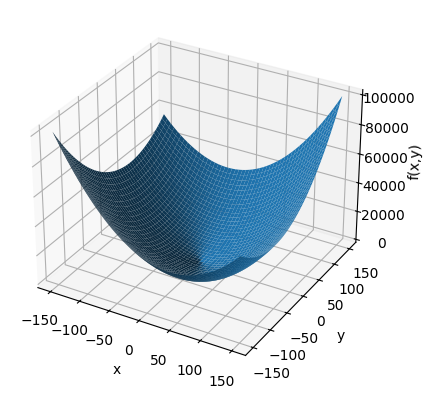

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

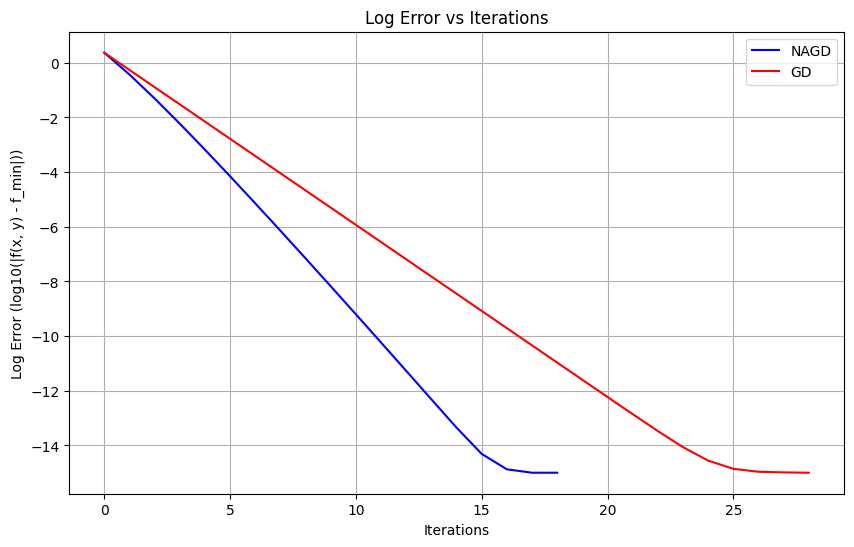

In [ ]:
min_value = f(x_nagd,y_nagd)
log_errors_nagd = np.log10(np.abs(np.array(f_val_nagd) - min_value + 10**-15))
log_errors_gd = np.log10(np.abs(np.array(f_val_gd) - min_value + 10**-15))

plt.figure(figsize=(10, 6))
plt.plot(log_errors_nagd, label="NAGD", color="blue")
plt.plot(log_errors_gd, label="GD", color="red")
plt.xlabel("Iterations")
plt.ylabel("Log Error (log10(|f(x, y) - f_min|))")
plt.title("Log Error vs Iterations")
plt.legend()
plt.grid()
plt.show()